In [102]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt

In [85]:
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf

In [114]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [79]:
folder = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/datasets/finales/"
filename = "affluent_std.csv"
dataset = read_csv(folder + filename,parse_dates = ['hour'], index_col = ['hour'])

In [81]:
train = dataset[:32112]
test = dataset[32113:]

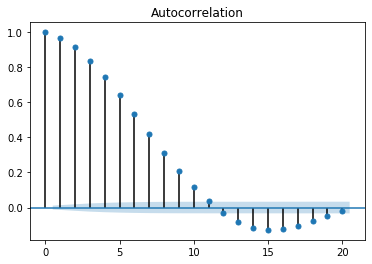

In [182]:
plot_acf(train['energy(kWh/hh)'],lags=20)
plt.show()
#q=10

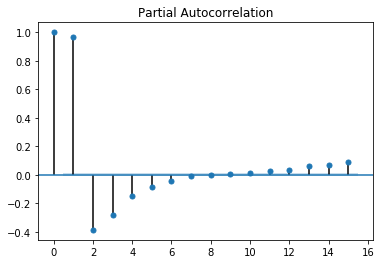

In [194]:
plot_pacf(train['energy(kWh/hh)'],lags=15)
plt.show();

# p = 2

In [314]:
arima_model = ARIMA(train,order = (2,0,9)).fit()
# p,d,q

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [315]:
print(arima_model.summary())

                              ARMA Model Results                              
Dep. Variable:         energy(kWh/hh)   No. Observations:                32112
Model:                     ARMA(2, 9)   Log Likelihood               80232.825
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sun, 05 Apr 2020   AIC                        -160439.651
Time:                        18:17:54   BIC                        -160330.750
Sample:                             0   HQIC                       -160404.822
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2161      0.001    256.883      0.000       0.214       0.218
ar.L1.energy(kWh/hh)     1.9826   5.83e-05    3.4e+04      0.000       1.982       1.983
ar.L2.energy

In [316]:
ARIMA_prediction = arima_model.predict(start=32112, end =35040,typ= 'levels')

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [317]:
actual = read_csv(folder + filename)
actual = actual["energy(kWh/hh)"].to_list()
y_test = actual[32111:]

In [318]:
y_pred = ARIMA_prediction.to_list()

In [319]:
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(y_test,y_pred))

0.05958867623572816


In [320]:
def sMAPE(a, b):
    """
    Calculates sMAPE
    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(100*2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()

In [321]:
sMAPE(y_test,y_pred)

24.93804991189763